# Data Briefing

The dataset captures various aspects related to symptoms, test outcomes, and potential risk factors for COVID-19. It could be used for exploring patterns, predicting COVID-19 outcomes, or assessing the impact of different features on the likelihood of testing positive.

Ind_ID: Individual ID or unique identifier for each record.

Test_date: Date when the COVID-19 test was conducted.

Cough_symptoms: Presence or absence of cough symptoms (Boolean: TRUE/FALSE).

Fever: Presence or absence of fever (Boolean: TRUE/FALSE).

Sore_throat: Presence or absence of a sore throat (Boolean: TRUE/FALSE).

Shortness_of_breath: Presence or absence of shortness of breath (Boolean: TRUE/FALSE).

Headache: Presence or absence of headache (Boolean: TRUE/FALSE).

Corona: COVID-19 test result (Categorical: positive/negative).

Age_60_above: Whether the individual is 60 years old or above (Binary: TRUE/FALSE or possibly 'None' for missing values).

Sex: Gender of the individual.

Known_contact: Information about known contact with confirmed COVID-19 cases (Categorical: Abroad, Contact with confirmed, Other).

# Proposal

**Title:** **Leveraging Machine Learning for Accurate COVID-19 Prediction and Beyond**

**Introduction:** In today's world, where the global healthcare system is facing unprecedented challenges, the accurate prediction of diseases has become crucial for effective medical treatment. This proposal aims to highlight the importance of leveraging machine learning techniques to predict COVID-19 accurately and explore the potential impact on medical treatment, screening processes, and healthcare burden reduction.

**Importance in Today's World:** The ongoing COVID-19 pandemic has underscored the critical need for accurate disease prediction. Predictive models can aid healthcare professionals in identifying potential positive cases early, allowing for timely intervention and resource allocation. The proposal addresses the urgency of implementing advanced machine learning algorithms to enhance our ability to predict and manage diseases in real-time.

**Improving Medical Treatment:** Accurate disease prediction is paramount for improving medical treatment outcomes. By employing machine learning models on comprehensive datasets, we can identify patterns and factors influencing COVID-19 positivity. Early detection enables healthcare providers to initiate timely and targeted interventions, reducing the severity of the disease and improving patient outcomes. Additionally, it facilitates personalized treatment plans tailored to individual risk factors.

**Impact on Effective Screening:** Implementing machine learning in disease prediction transforms the screening process. By analyzing diverse data points such as symptoms, age, gender, and contact history, the proposed model enhances the screening accuracy. This, in turn, minimizes the chances of false negatives and positives, enabling a more efficient allocation of testing resources. Enhanced screening can identify positive cases early, allowing for timely isolation and contact tracing to curb the spread.

**Reducing Healthcare Burden:** Accurate disease prediction can significantly reduce the burden on the healthcare system. Early identification of positive cases helps in managing hospital resources more effectively, preventing overcrowding and ensuring that critical care is available for those who need it most. Moreover, targeted interventions based on prediction models can prevent unnecessary hospitalizations, reducing the strain on medical facilities.

**Addressing Knowledge Gaps:** While current medical knowledge has made significant strides, there remains a gap in predicting and managing infectious diseases swiftly. The proposed machine learning approach fills this gap by providing a dynamic and adaptable tool for predicting diseases based on evolving data. Furthermore, the methodology developed for predicting COVID-19 can serve as a blueprint for addressing future health crises, demonstrating the versatility of machine learning in predicting a wide range of diseases.

**Conclusion:** In conclusion, leveraging machine learning for disease prediction, especially in the context of COVID-19, holds immense potential for transforming medical treatment, screening processes, and reducing the healthcare burden. By addressing gaps in current knowledge and providing a robust predictive model, we can enhance our preparedness for future health challenges. This proposal advocates for the integration of advanced technologies in healthcare to build a resilient and proactive medical system.

In [1]:
# Importing base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

In [2]:
# Reading the data
covid_raw = pd.read_csv('corona_tested_006.csv', low_memory=False)

# Making a copy to work further on the data
covid = covid_raw.copy(deep=True)

# Basic Exploration

In [3]:
# Checking the first five records
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [4]:
# Checking the last five records
covid.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,male,Other
278844,278845,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
278845,278846,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
278846,278847,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
278847,278848,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other


In [5]:
# Checking the shape of the data set
covid.shape

(278848, 11)

In [6]:
# Checking basic info and data types
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [7]:
# Since the data doesn't have any numerical columns I have used the include all
# parameter to describe the data as much as possible.
covid.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,3,3,3,3,3,3,3,3,3
top,NaN,20-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
freq,NaN,10921,236368,256844,276921,277270,276433,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Checking unique values for each column
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              3
Fever                       3
Sore_throat                 3
Shortness_of_breath         3
Headache                    3
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [9]:
# Iterate over each column except the first two columns
for column in covid.columns[2:]:
  # Print the value counts of each column
  print(covid[column].value_counts())

FALSE    236368
TRUE      42228
None        252
Name: Cough_symptoms, dtype: int64
FALSE    256844
TRUE      21752
None        252
Name: Fever, dtype: int64
FALSE    276921
TRUE       1926
None          1
Name: Sore_throat, dtype: int64
FALSE    277270
TRUE       1577
None          1
Name: Shortness_of_breath, dtype: int64
FALSE    276433
TRUE       2414
None          1
Name: Headache, dtype: int64
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64
female    130158
male      129127
None       19563
Name: Sex, dtype: int64
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64


From the meta data we know that all the features and label are of binary type so I am going to replace all the other, none values to NaN. Also True and False are wirtten in multiple cases so I'll consolidate the same.

In [10]:
# Consolidating the cases
covid = covid.applymap(lambda x: str(x).strip().capitalize())

# Changing non binary values to NaN
for column in covid.columns[2:]:
  covid[column] = np.where(covid[column].isin(['None', 'Other']), np.nan, covid[column])

In [11]:
# Checking if the modification went as planned

# Iterate over each column except the first two columns
for column in covid.columns[2:]:
  # Print the value counts of each column
  print(covid[column].value_counts())

False    236368
True      42228
Name: Cough_symptoms, dtype: int64
False    256844
True      21752
Name: Fever, dtype: int64
False    276921
True       1926
Name: Sore_throat, dtype: int64
False    277270
True       1577
Name: Shortness_of_breath, dtype: int64
False    276433
True       2414
Name: Headache, dtype: int64
Negative    260227
Positive     14729
Name: Corona, dtype: int64
No     125703
Yes     25825
Name: Age_60_above, dtype: int64
Female    130158
Male      129127
Name: Sex, dtype: int64
Abroad                    25468
Contact with confirmed    10639
Name: Known_contact, dtype: int64


In [12]:
# Checking missing values
covid.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact          242741
dtype: int64

In [13]:
# Checking unique values for each column
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      2
Age_60_above                2
Sex                         2
Known_contact               2
dtype: int64

# Initial Hypothesis

**Symptom Influence:**

Hypothesis: The presence of multiple symptoms such as cough, fever, sore throat, and shortness of breath might have a significant impact on predicting a positive COVID-19 case.

**Age Factor:**

Hypothesis: Individuals aged 60 and above may have a higher likelihood of testing positive for COVID-19 due to potential vulnerabilities in this age group.

**Gender Differences:**

Hypothesis: There might be gender-based variations in COVID-19 cases, with one gender being more susceptible than the other.

**Known Contact Impact:**

Hypothesis: Individuals with known contact with confirmed cases are more likely to test positive for COVID-19.

**Headache as an Indicator:**

Hypothesis: The presence of a headache might be an early indicator or correlate with positive COVID-19 cases.

# Exploratory Data Analysis

<Axes: >

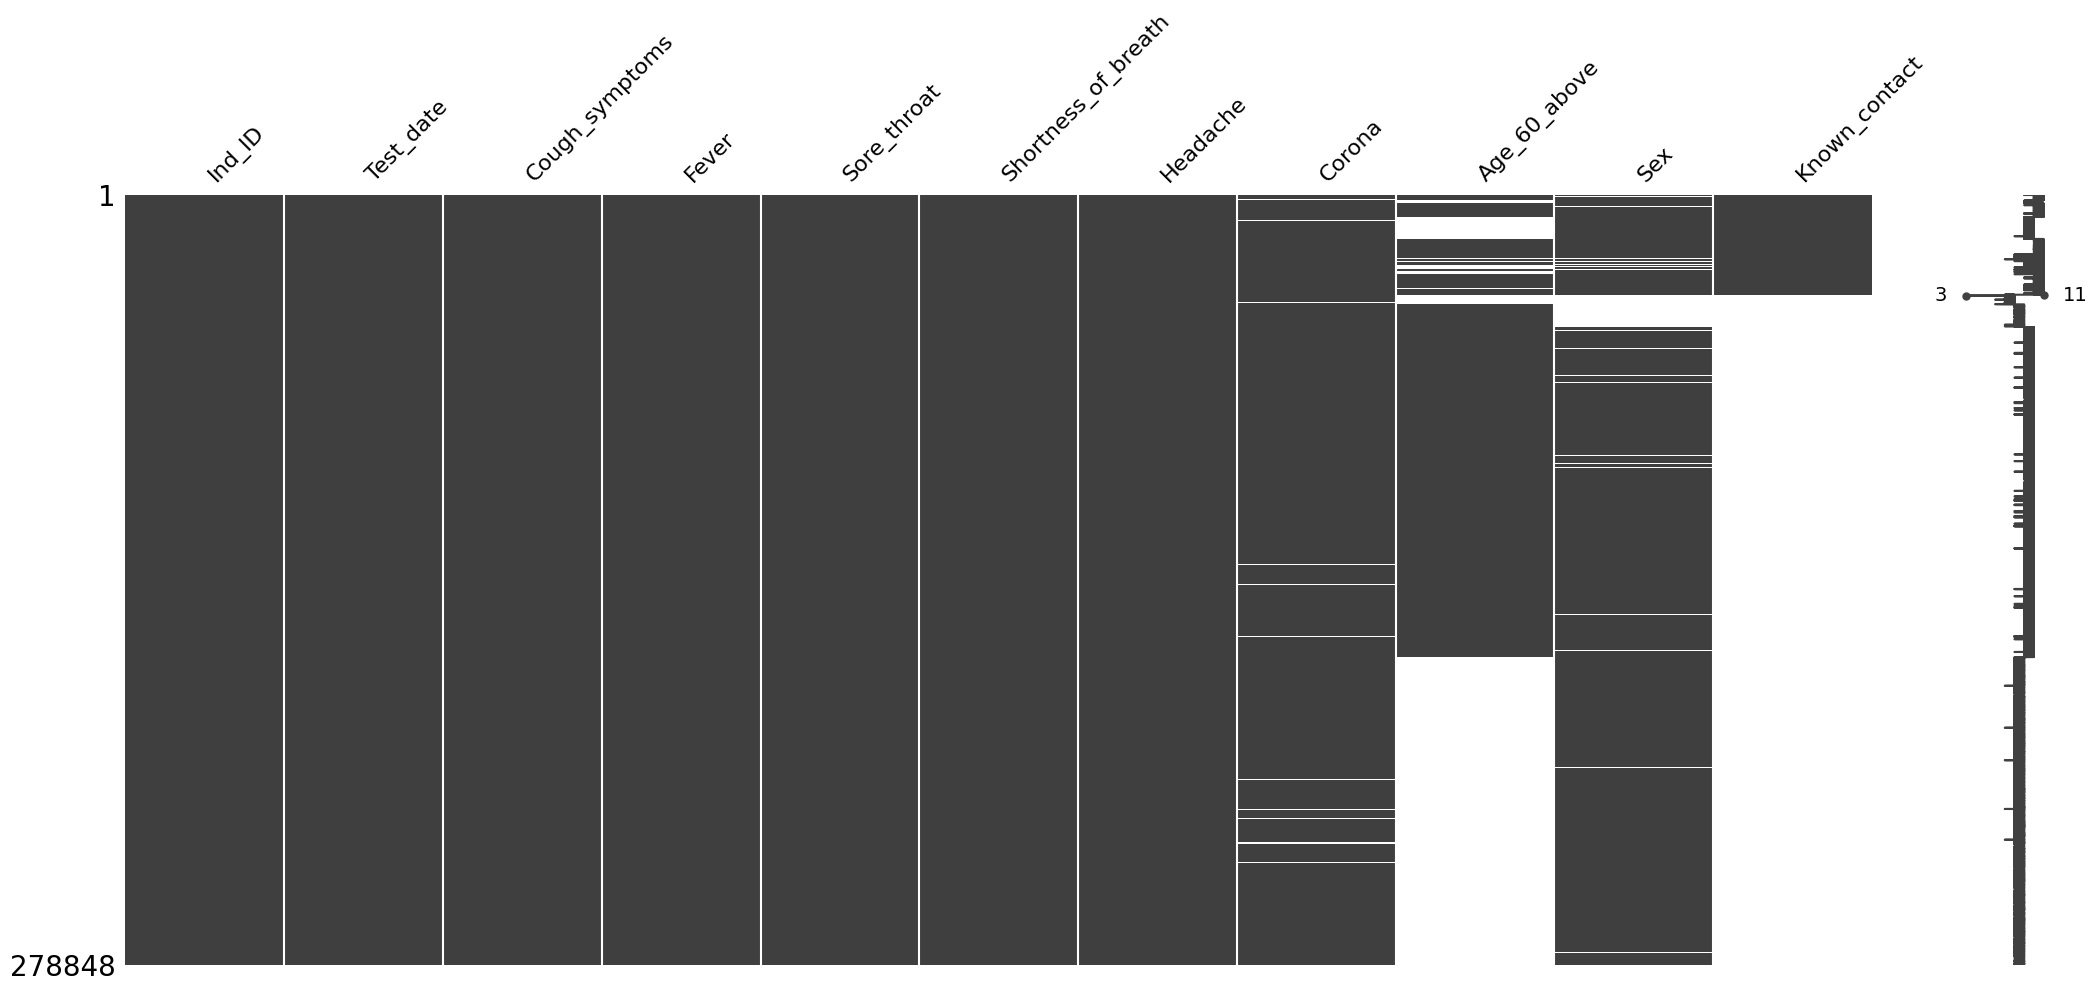

In [14]:
# Creating a matrix for missing values
msno.matrix(covid.sort_values(by='Known_contact'))

Insights: As we can see most missing values are present in the known_contact column followed by Age_60_above and Sex.

In [15]:
# Calculating the percentage of missing values in Known_contact
missing_percentage = covid['Known_contact'].isnull().mean() * 100

missing_percentage

87.0513684874914

More than 87% values are missing however this seems like a vital feature so I will not be dropping it right now.

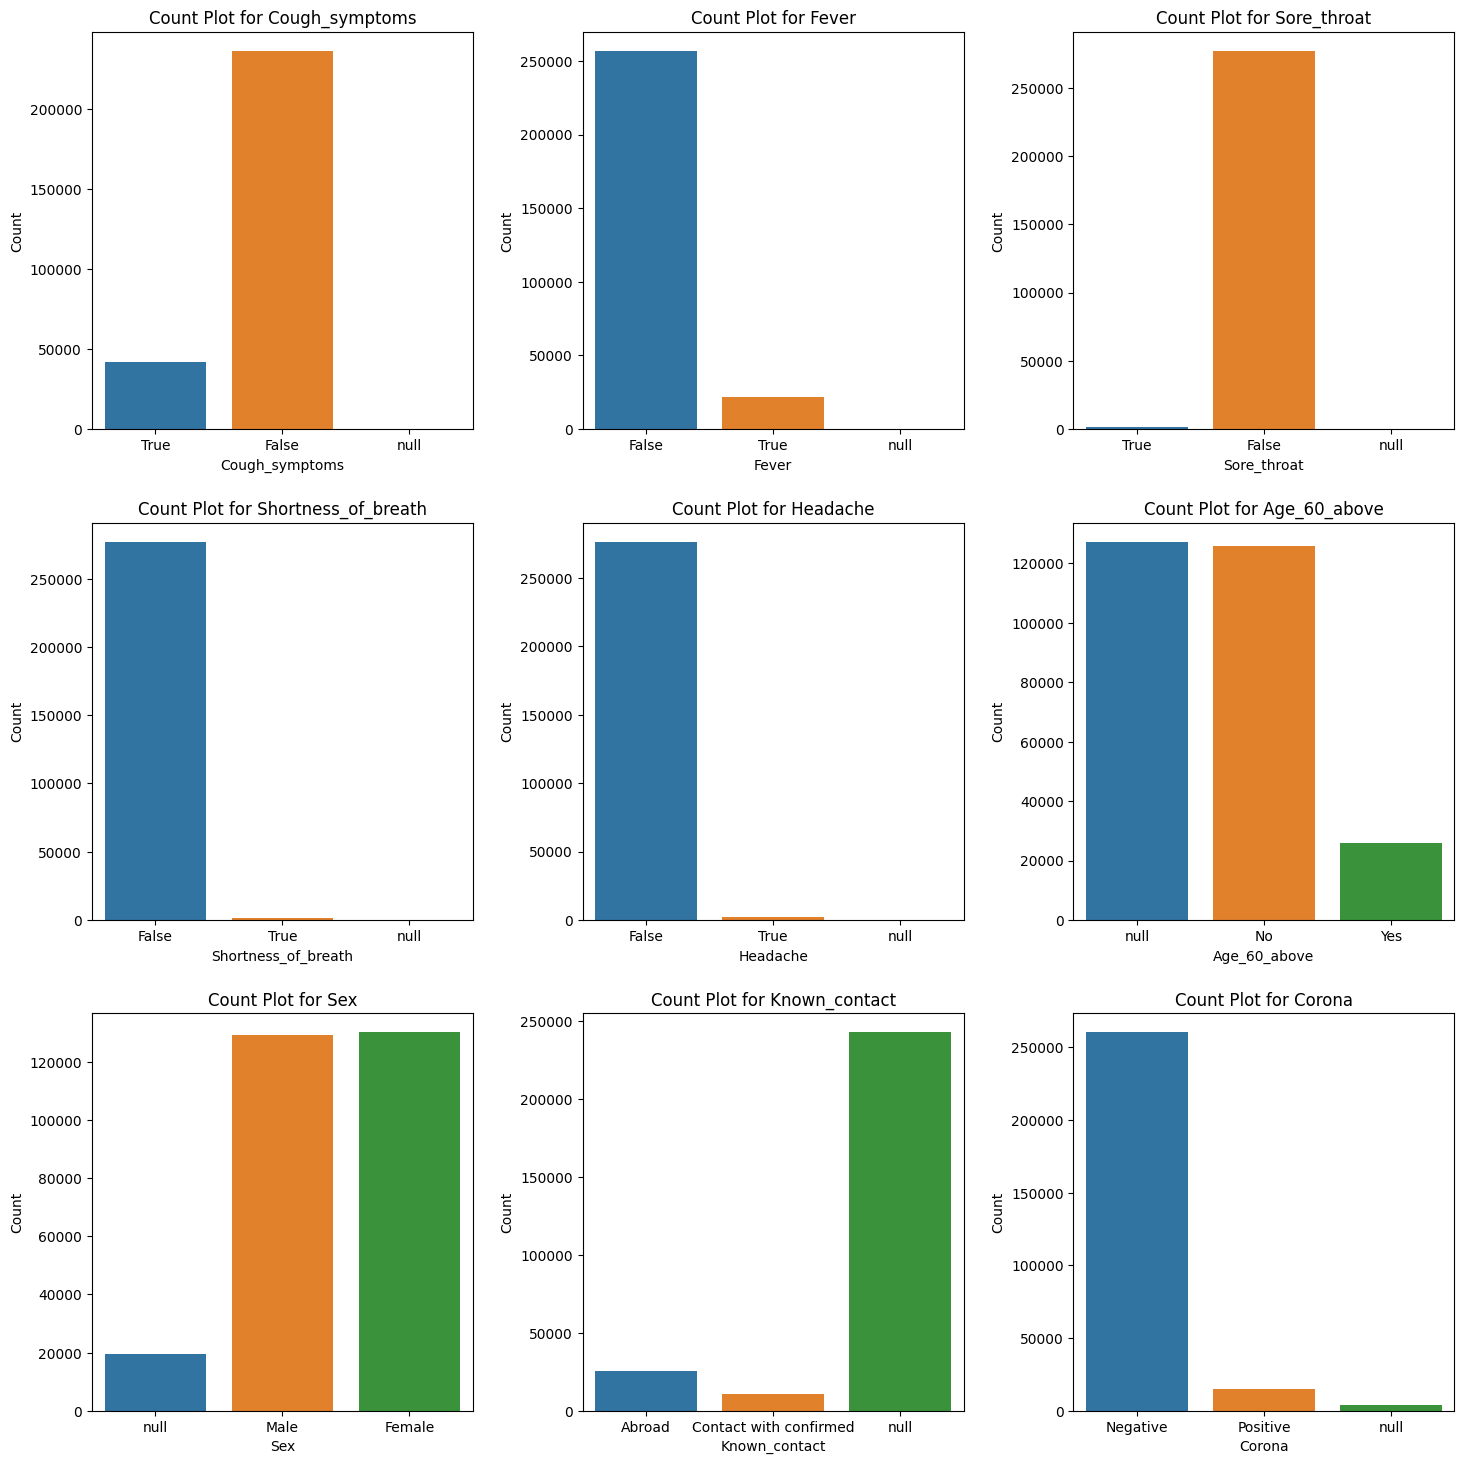

In [16]:
# Distribution of the features:

# Replaced NaN values with a placeholder ('null') in new dataframe
covid_filled = covid.fillna('null')

# Set up subplots with 3 columns per row
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# List of features to include in count plots
features = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

# Plot count plots for each feature and the label
for i, feature in enumerate(features):
    sns.countplot(x=feature, data=covid_filled, ax=axes[i])
    axes[i].set_title(f'Count Plot for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Add count plot for the label 'Corona'
sns.countplot(x='Corona', data=covid_filled, ax=axes[-1])
axes[-1].set_title('Count Plot for Corona')
axes[-1].set_xlabel('Corona')
axes[-1].set_ylabel('Count')

# Adjust layout and add space between subplots
plt.tight_layout(pad=2.0)

# Show the plots
plt.show()


Insights:
1. The number of records for both males and females is nearly identical, providing a balanced dataset for future analysis.

2. The majority of patients tested negative for Corona based on the results.

3. A large portion of the patients are below the age of 60.

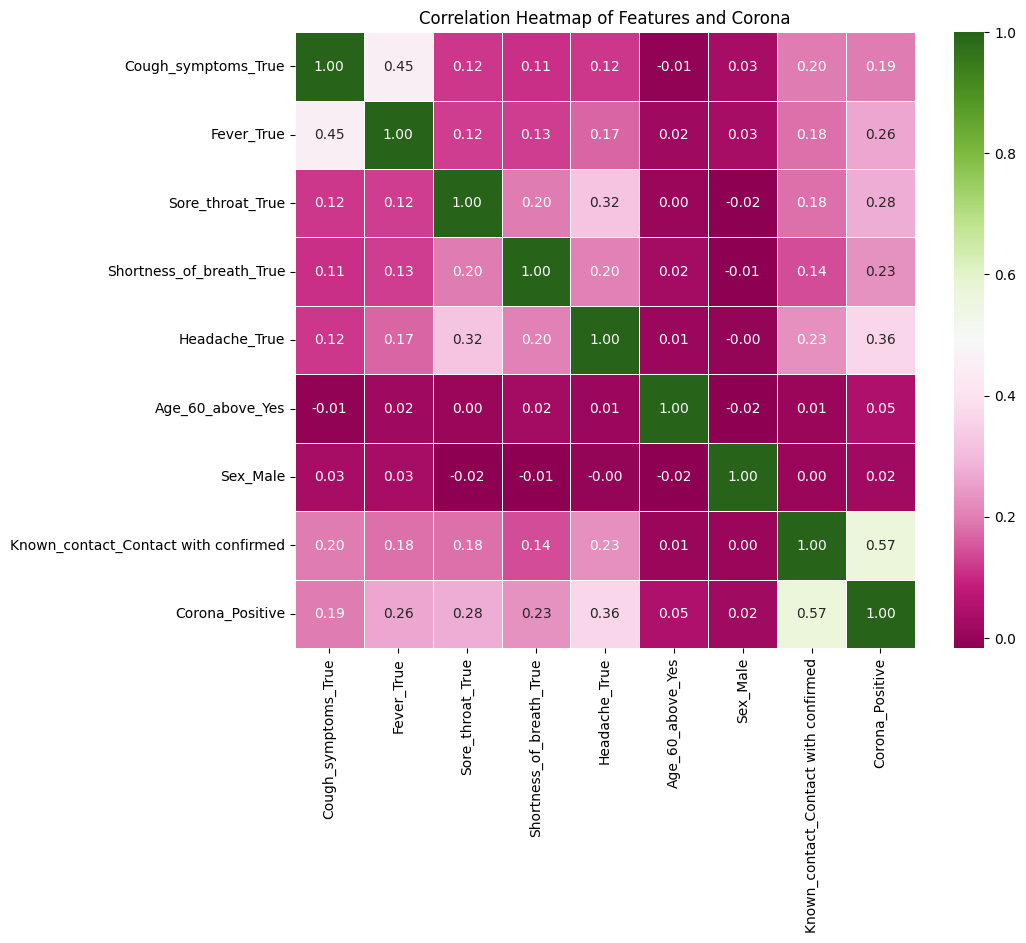

In [17]:
# Visualizing corelation of among independent features and with label Corona

# List of features to include in the correlation heatmap
features = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']
label = 'Corona'

# Convert categorical data to one-hot encoding
covid_encoded = pd.get_dummies(covid[features + [label]], drop_first=True)

# Calculate correlation matrix
correlation_matrix = covid_encoded.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f", linewidths=.5)

# Add labels and title
plt.title(f'Correlation Heatmap of Features and {label}')
plt.show()


Insights:

1. The data reveals that Corona exhibits the strongest positive correlation with Known_contact, indicating a significant impact of being positive depending on whether the patient came in contact with someone who has covid.

2. Conversely, Corona demonstrates the weakest positive correlation with Sex.

3. Exploring additional features, Fever shows the highest positive correlation with Cough symptoms. Additionally, there is a slight negative correlation observed between Sex and Sore throat, as well as between Sex and Patients above age 60.



In [18]:
# Area Chart for daily positive covid cases

# Convert 'Test_date' to datetime type without permanent change
covid['Test_date'] = pd.to_datetime(covid['Test_date'], format='%d-%m-%Y', errors='coerce', infer_datetime_format=True)

# Group by 'Test_date' and count the positive cases for each day
daily_cases = covid[covid['Corona'] == 'Positive'].groupby('Test_date').size().reset_index(name='Positive Cases')

# Create an area chart with markers and data labels using Plotly Express
fig = px.area(daily_cases, x='Test_date', y='Positive Cases',
              title='Daily Trend of Corona Positive Cases',
              labels={'Positive Cases': 'Daily Cases'},
              markers=True,  # Show markers
              text='Positive Cases',  # Display data labels
              template='plotly_dark')  # Choose a template (optional)

# Customize the layout
fig.update_layout(showlegend=False)  # Hide the legend for a cleaner look

# Show the plot
fig.show()


Insights:

1. A consistent rise in positive COVID-19 cases is evident from March 15th until the final week of March. Subsequently, there is a minor decrease in case numbers during the last week until March 29th.

2. The peak with the maximum number of cases (730) occurred in April, specifically between April 1st and April 5th.

3. Following April 5th, there was considerable volatility in the number of cases; however, overall, it has shown a decline.

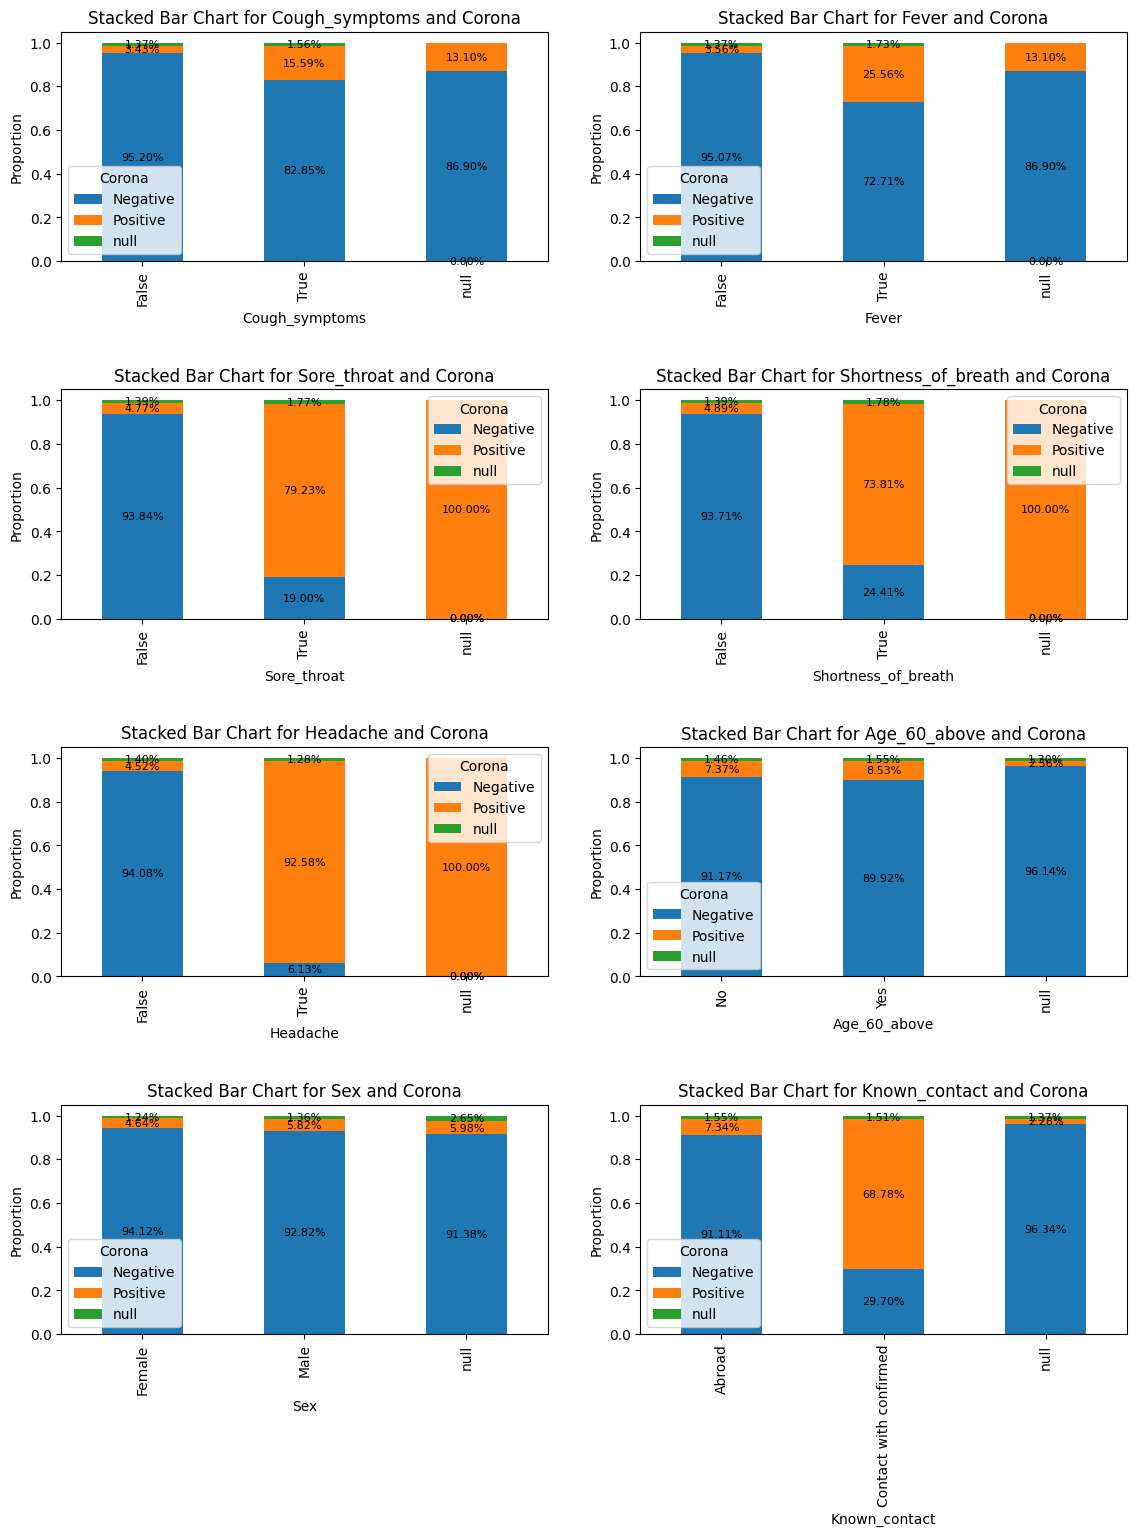

In [19]:
# Plotting Corona against the features to see how many positive, negative and null cases we have for each feature

# List of features to include in stacked bar charts
features = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

# Set up subplots with 2 columns per row
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

# Define colors for negative, positive, and other
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot stacked bar charts for each feature vs. Corona using covid_filled
for i, feature in enumerate(features):
    stacked_data = pd.crosstab(covid_filled[feature], covid_filled['Corona'], normalize='index')
    stacked_data.plot(kind='bar', stacked=True, ax=axes[i], color=colors)

    # Annotate the values on each bar
    for p in axes[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        axes[i].annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8)

    axes[i].set_title(f'Stacked Bar Chart for {feature} and Corona')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Proportion')

# Adjust layout and add space between subplots
plt.tight_layout(pad=3.0)

# Show the plots
plt.show()

Insights:


1. According to the plot, it appears that Headache is the predominant symptom, followed by Sore throat and Shortness of breath.

2. The proportion of males and females reporting positive for Corona is not significantly different.

3. Individuals with a history of contact with someone diagnosed with Corona are more prone to testing positive themselves.



# **Data Preprocessing**

In [20]:
from sklearn.impute import SimpleImputer
# Imputing and Encoding each feature and label.
# I will be using simple imputer with most frequent strategy
# For encoding I'll using one hot encoding via pandas get_dummies function

covid_imputed = covid.copy()  # Creating a copy of the original DataFrame
covid_imputed_encoded = pd.DataFrame()  # Initializing an empty DataFrame

# Creating imputer object
mode_imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

for column in covid.columns[2:]:
    # Fit on the entire column and then transform it
    covid_imputed[column] = mode_imputer.fit_transform(covid[[column]])

    # Creating dummy variables and assigning to the new DataFrame
    covid_imputed_encoded = pd.concat([covid_imputed_encoded, pd.get_dummies(covid_imputed[column], prefix=column, drop_first=True)], axis=1)

# Concatenating the DataFrames along columns
covid_imputed_encoded_df = pd.concat([covid.iloc[:, :2], covid_imputed_encoded], axis=1)

# Checking if the encoding went as planned
covid_imputed_encoded_df


,Ind_ID,Test_date,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Corona_Positive,Age_60_above_Yes,Sex_Male,Known_contact_Contact with confirmed
0,1,2020-03-11,1,0,1,0,0,0,0,0,0
1,2,2020-03-11,0,1,0,0,0,1,0,0,0
2,3,2020-03-11,0,1,0,0,0,1,0,0,0
3,4,2020-03-11,1,0,0,0,0,0,0,0,0
4,5,2020-03-11,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,0,0,0,0,0,1,0,1,0
278844,278845,2020-04-30,0,0,0,0,0,0,0,0,0
278845,278846,2020-04-30,0,0,0,0,0,0,0,1,0
278846,278847,2020-04-30,0,0,0,0,0,0,0,1,0


<Axes: >

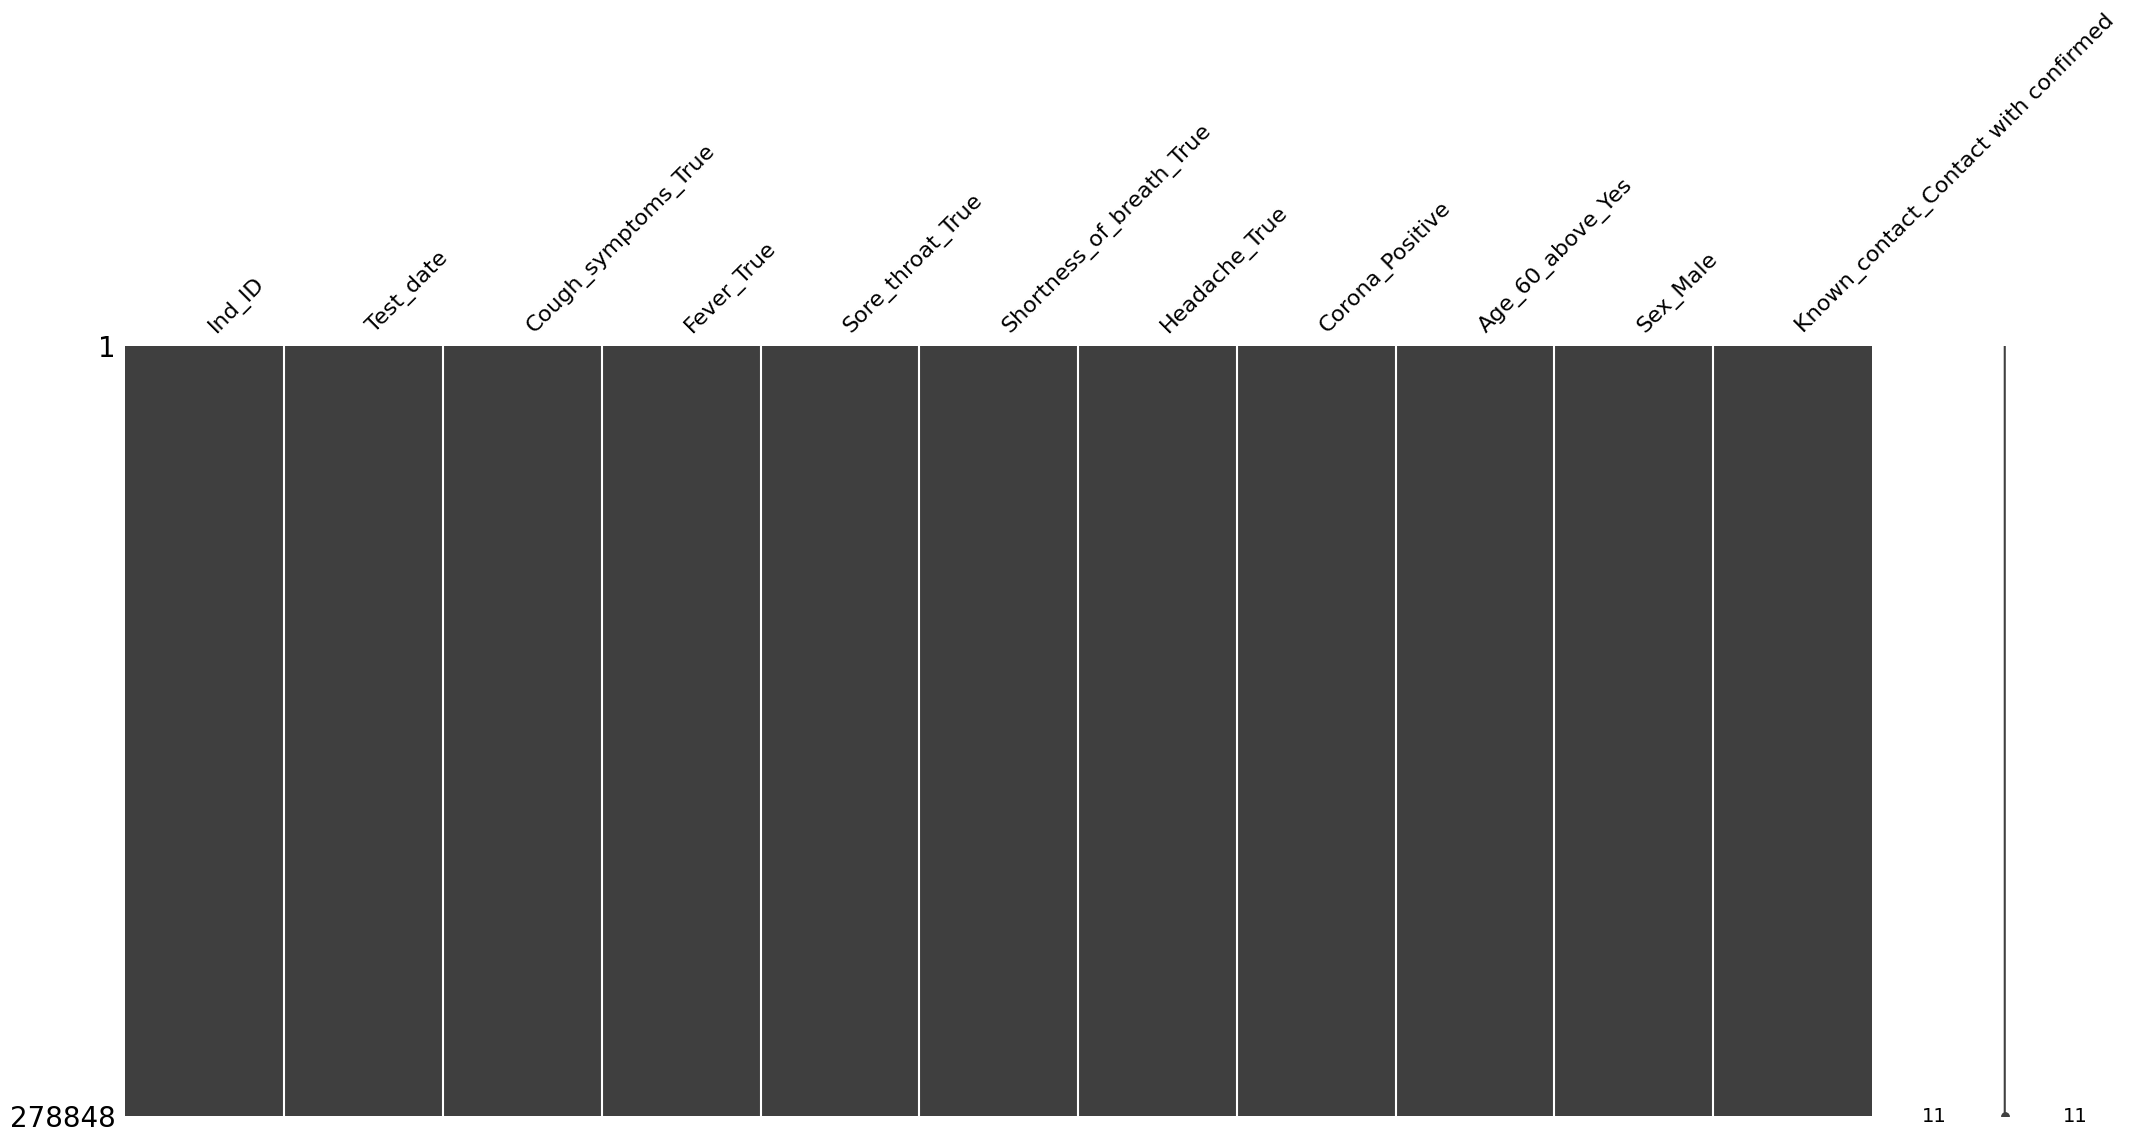

In [21]:
# Checking if the all the missing values are gone
msno.matrix(covid_imputed_encoded_df)

# Feature Selection

In [22]:
# Splitting the data as per requirement: (We have data from 11th March 2020 till 30th April 2020.
# Please consider 11th March till 15th April as a training and validation set.
# From 16th April till 30th April as a test set. Please further divide training and validation set at a ratio of 4:1.)

# Convert 'Test_date' to datetime type
covid_imputed_encoded_df['Test_date'] = pd.to_datetime(covid_imputed_encoded_df['Test_date'], format='%d-%m-%Y')

# Slicing the data frame to create training and validation set
train_validate_set = covid_imputed_encoded_df[(covid_imputed_encoded_df['Test_date'] >= '2020-03-11') &
                                          (covid_imputed_encoded_df['Test_date'] <= '2020-04-16')]


# Slicing the data frame to create test set
test_set = covid_imputed_encoded_df[covid_imputed_encoded_df['Test_date'] >= '2020-04-17']

In [23]:
from sklearn.model_selection import train_test_split

# Further dividing trainning and validation set in 4:1 ratio
X_validation = train_validate_set.drop(['Ind_ID', 'Test_date', 'Corona_Positive'], axis=1)
y_validation = train_validate_set['Corona_Positive']


# Splitting the data in 80 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_validation, y_validation, test_size=0.2, shuffle=True, stratify=y_validation, random_state=42)

# Printing the shapes:
print(f'X_train shape: {X_train.shape}')
print('\n')
print(f'X_test shape: {X_test.shape}')
print('\n')
print(f'y_train shape: {y_train.shape}')
print('\n')
print(f'y_test shape: {y_test.shape}')


X_train shape: (137861, 8)


X_test shape: (34466, 8)


y_train shape: (137861,)


y_test shape: (34466,)


Feature: 0, Score: 0.04302
Feature: 1, Score: 0.10004
Feature: 2, Score: 0.09343
Feature: 3, Score: 0.05861
Feature: 4, Score: 0.19469
Feature: 5, Score: 0.01331
Feature: 6, Score: 0.01015
Feature: 7, Score: 0.48676


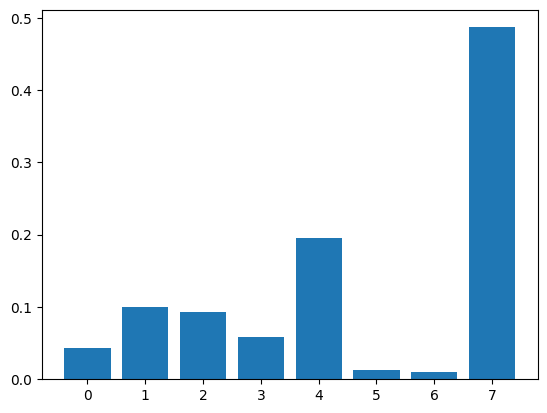

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Checking the feature importance
model = RandomForestClassifier()

# fit the model
model.fit(X_validation, y_validation)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

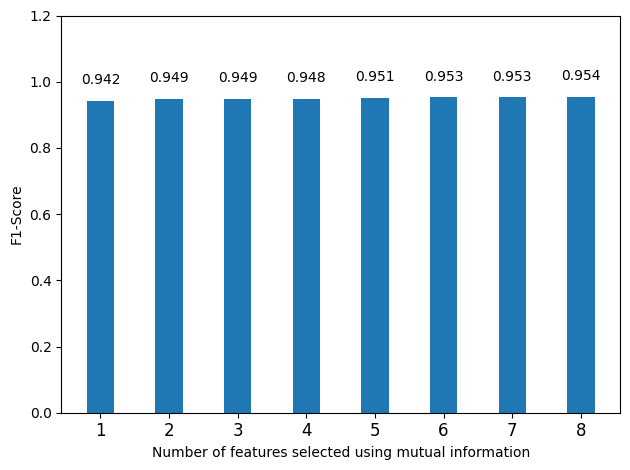

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, RFE, mutual_info_classif
from sklearn.metrics import f1_score

#Selecting the features with KBest

# intializing an empty list for f1 scores
kbest_f1_score_list = []

# Creating decision tree calssifier object

dtree_clf = DecisionTreeClassifier()

# trying out different variable combination through a loop
for k in range(1, 9):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train, y_train)

    sel_X_train = selector.transform(X_train)
    sel_X_test = selector.transform(X_test)

    dtree_clf.fit(sel_X_train, y_train)
    kbest_preds = dtree_clf.predict(sel_X_test)

    f1_score_kbest = round(f1_score(y_test, kbest_preds, average='weighted'), 3)

    kbest_f1_score_list.append(f1_score_kbest)


# Plotting a bar graph of F1 score for different combination of features

fig, ax = plt.subplots()

x = np.arange(1, 9)
y = kbest_f1_score_list

ax.bar(x, y, width=0.4)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 9))
ax.set_xticklabels(np.arange(1, 9), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

plt.tight_layout()


As we can there is not much increase in f1 score once we have selected five features, so let's check which five features were selected.

In [26]:
# Finding out which features were selected

selector = SelectKBest(mutual_info_classif, k=5)
selector.fit(X_train, y_train)

selected_feature_mask = selector.get_support()

selected_features = X_train.columns[selected_feature_mask]

selected_features

Index(['Cough_symptoms_True', 'Fever_True', 'Sore_throat_True',
       'Headache_True', 'Known_contact_Contact with confirmed'],
      dtype='object')

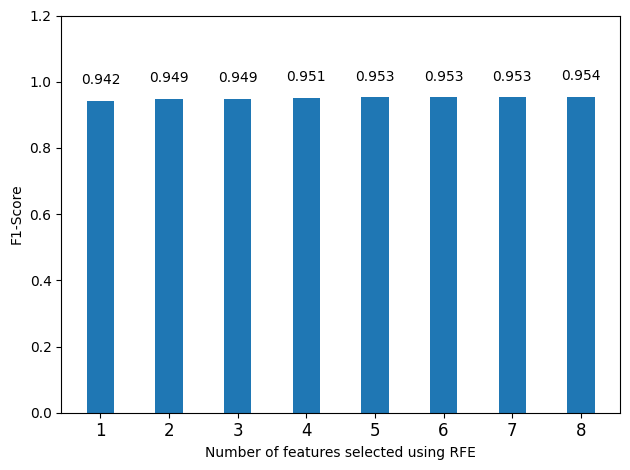

In [27]:
# Feature selection using RFE

# intializing an empty list for f1 scores
rfe_f1_score_list = []



for k in range(1, 9):
    RFE_selector = RFE(estimator=dtree_clf, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train, y_train)

    sel_X_train_rfe = RFE_selector.transform(X_train)
    sel_X_test_rfe = RFE_selector.transform(X_test)

    dtree_clf.fit(sel_X_train_rfe, y_train)
    RFE_preds = dtree_clf.predict(sel_X_test_rfe)

    f1_score_rfe = round(f1_score(y_test, RFE_preds, average='weighted'), 3)

    rfe_f1_score_list.append(f1_score_rfe)

# Plotting a bar graph of F1 score for different combination of features
fig, ax = plt.subplots()

x = np.arange(1, 9)
y = rfe_f1_score_list

ax.bar(x, y, width=0.4)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 9))
ax.set_xticklabels(np.arange(1, 9), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

plt.tight_layout()

In [28]:
# Finding out which features were selected

RFE_selector = RFE(estimator=dtree_clf, n_features_to_select=5, step=5)
RFE_selector.fit(X_train, y_train)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train.columns[selected_features_mask]
selected_features

Index(['Fever_True', 'Sore_throat_True', 'Shortness_of_breath_True',
       'Headache_True', 'Known_contact_Contact with confirmed'],
      dtype='object')

# Feature Selection Verdict

Choosing features for a machine learning model involves a thoughtful consideration of their relevance and impact on the target variable. Here's a justification for selecting the features ['Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact'] based on the outputs from SelectKBest and Recursive Feature Elimination (RFE).

**Fever:**

Fever is a classic symptom of various illnesses, including viral infections. Its inclusion is justified as it is a crucial indicator that may strongly correlate with the occurrence of COVID-19.

**Headache:**

While headaches are a common symptom in many illnesses, their inclusion can provide additional information. In some cases, they might be indicative of viral infections. Including this feature adds another dimension to the model.

**Known Contact:**

Knowing if an individual has had contact with a confirmed COVID-19 case is crucial information. This feature can directly contribute to predicting COVID-19 cases, making it a valuable addition to the model.

**Sore Throat:**

Sore throat is a symptom that is commonly associated with respiratory infections, including COVID-19. Its inclusion enhances the model's ability to capture relevant symptoms, contributing to a more comprehensive prediction.

**Shortness of Breath:**

Shortness of breath is a critical symptom in severe cases of COVID-19. Its inclusion provides the model with the ability to recognize cases where individuals might be at an advanced stage of the illness, leading to a more nuanced prediction.

In summary, the selected features represent a combination of general symptoms (Fever, Headache, Sore Throat) along with specific risk factors (Known Contact, Shortness of Breath) that are relevant to COVID-19. This combination allows the model to consider both general symptoms and specific circumstances that increase the likelihood of having COVID-19, providing a comprehensive and informed approach.

As a result, the finalized set of features provides a more robust foundation for predicting COVID-19 cases, encompassing both common symptoms and distinctive risk factors associated with the disease.

# Model Selection

In [29]:
# Prerequisites
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import math
from sklearn.metrics import accuracy_score , classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [30]:
# Creating a new X variable with selected features

X_selected_features = pd.DataFrame(X_validation).drop(['Cough_symptoms_True', 'Age_60_above_Yes', 'Sex_Male' ], axis=1)

# Splitting the data again whith selected features in 80 20 ratio
X_train_selected_features, X_test_selected_features, y_train, y_test = train_test_split(X_selected_features, y_validation, test_size=0.2, shuffle=True, stratify=y_validation, random_state=42)


# Trying out different models with weighted average

models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_selected_features, y_train.values.ravel()) # Train Model

    # Make predictions
    y_train_pred = model.predict(X_train_selected_features)
    y_test_pred =  model.predict(X_test_selected_features)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')



Logisitic Regression
Model performance for Training set
- Accuracy: 0.95
- F1 score: 0.942110
- Precision: 0.945058
- Recall: 0.950305
----------------------------------
Model performance for Test set
- Accuracy: 0.95
- Fl score: 0.94
- Precision: 0.94
- Recall: 0.95


Decision Tree
Model performance for Training set
- Accuracy: 0.95
- F1 score: 0.953368
- Precision: 0.952548
- Recall: 0.954476
----------------------------------
Model performance for Test set
- Accuracy: 0.95
- Fl score: 0.95
- Precision: 0.95
- Recall: 0.95


Random Forest
Model performance for Training set
- Accuracy: 0.95
- F1 score: 0.953368
- Precision: 0.952548
- Recall: 0.954476
----------------------------------
Model performance for Test set
- Accuracy: 0.95
- Fl score: 0.95
- Precision: 0.95
- Recall: 0.95


K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.95
- F1 score: 0.942493
- Precision: 0.944506
- Recall: 0.950153
----------------------------------
Model performance for Test set
- Ac

In [31]:
# Trying out different models without weighted average

models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_selected_features, y_train.values.ravel()) # Train Model

    # Make predictions
    y_train_pred = model.predict(X_train_selected_features)
    y_test_pred =  model.predict(X_test_selected_features)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall  = recall_score(y_test, y_test_pred)

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.95
- F1 score: 0.528914
- Precision: 0.812764
- Recall: 0.392009
----------------------------------
Model performance for Test set
- Accuracy: 0.95
- Fl score: 0.52
- Precision: 0.81
- Recall: 0.38


Decision Tree
Model performance for Training set
- Accuracy: 0.95
- F1 score: 0.663377
- Precision: 0.700102
- Recall: 0.630313
----------------------------------
Model performance for Test set
- Accuracy: 0.95
- Fl score: 0.66
- Precision: 0.70
- Recall: 0.62


Random Forest
Model performance for Training set
- Accuracy: 0.95
- F1 score: 0.663377
- Precision: 0.700102
- Recall: 0.630313
----------------------------------
Model performance for Test set
- Accuracy: 0.95
- Fl score: 0.66
- Precision: 0.70
- Recall: 0.62


K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.95
- F1 score: 0.535676
- Precision: 0.794548
- Recall: 0.404036
----------------------------------
Model performance for Test set
- Ac

# Model Selection Verdict

Note: Since with weighted average all the models performed almost the same I'll consider scores of models without weighted average.

**Justification:**

As we can clearly see from the metrices Decision Tree and Random Forest have the best overall scores among these four models.

While Decision Tree and Random Forest models share identical scores in metrics like accuracy, F1 score, precision, and recall, the decision to favor Random Forest is rooted in the ensemble learning benefits it provides. Random Forest's ability to reduce sensitivity to training data variations, enhance performance on unseen data, and effectively handle complex relationships gives it a clear edge over the standalone Decision Tree.

In conclusion, the Random Forest Classifier emerges as a dependable and versatile choice for the classification task at hand. Its consistent performance, balanced F1 score, ensemble advantages, and adaptability to diverse datasets collectively position it as a robust final model for the given machine learning project.

# **Hyper Parameter Tuning**

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Creating parameters dictionary

param_grid = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(10, 21)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Creating Randomized Search Cross Validation object
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    cv=10,       # Number of cross-validation folds
    random_state=42
)

# Fitting with the data
random_search.fit(X_train_selected_features, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789b8573b5b0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789b85b22ad0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789b8573aec0>},
                   random_state=42)

In [33]:
# print best parameters after tuning
print(f'Randomized Search Best Parameters: {random_search.best_params_}.')

print('\n')

# print best estimators after tuning
print(f'Randomized Search Best Estimators: {random_search.best_estimator_}.')

Randomized Search Best Parameters: {'bootstrap': True, 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 70}.


Randomized Search Best Estimators: RandomForestClassifier(max_depth=12, min_samples_leaf=3, min_samples_split=9,
                       n_estimators=70).


In [34]:
# Creating the model with hyper tuned parameters
rf_classifier_tuned = RandomForestClassifier(bootstrap=True, max_depth=12, max_features='sqrt', min_samples_leaf=3, min_samples_split=9, n_estimators=70)

# fitting the model
rf_classifier_tuned.fit(X_train_selected_features, y_train)

y_validation_train_pred = rf_classifier_tuned.predict(X_train_selected_features)

y_validatin_test_pred = rf_classifier_tuned.predict(X_test_selected_features)

print('Model performance for Training set')

print(f'- Acuuracy: {round(accuracy_score(y_train, y_validation_train_pred),2)}')
print(f'- F1 Score: {round(f1_score(y_train, y_validation_train_pred),2)}')
print(f'- Precision: {round(precision_score(y_train, y_validation_train_pred),2)}')
print(f'- Recall: {round(recall_score(y_train, y_validation_train_pred),2)}')

print('----------------------------------')

print('Model performance for Test set')
print(f'- Accuracy: {round(accuracy_score(y_test, y_validatin_test_pred),2)}')
print(f'- F1 Score: {round(f1_score(y_test, y_validatin_test_pred),2)}')
print(f'- Precision: {round(precision_score(y_test, y_validatin_test_pred),2)}')
print(f'- Recall: {round(recall_score(y_test, y_validatin_test_pred),2)}')


print('='*30)

Model performance for Training set
- Acuuracy: 0.95
- F1 Score: 0.66
- Precision: 0.7
- Recall: 0.63
----------------------------------
Model performance for Test set
- Accuracy: 0.95
- F1 Score: 0.66
- Precision: 0.7
- Recall: 0.62


In [35]:
# Checking the cross validation scores (10 fold)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_classifier_tuned, X_selected_features, y_validation, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.93007602 0.96448674 0.95259096 0.96500899 0.96454477 0.95932223
 0.9415656  0.94295497 0.9573468  0.95839136]
Average Score: 0.9536288440383511


In [36]:
# Saving the model
from joblib import dump, load

dump(rf_classifier_tuned, 'Covid Identifier.joblib')

['Covid Identifier.joblib']

In [37]:
# Now I will check the model on test set which was kept aside

# Loading the model
identifier_model = load('Covid Identifier.joblib')

# Choosing the features and labels

X_holdout = test_set.drop(['Ind_ID', 'Test_date', 'Corona_Positive','Cough_symptoms_True', 'Age_60_above_Yes', 'Sex_Male' ], axis=1)

y_holdout = test_set['Corona_Positive']


# Predicting the values
y_holdout_pred = identifier_model.predict(X_holdout)

# Checking the metrices

print('Model performance ')

print(f'- Acuuracy: {round(accuracy_score(y_holdout, y_holdout_pred),2)}')
print(f'- F1 Score: {round(f1_score(y_holdout, y_holdout_pred),2)}')
print(f'- Precision: {round(precision_score(y_holdout, y_holdout_pred),2)}')
print(f'- Recall: {round(recall_score(y_holdout, y_holdout_pred),2)}')


Model performance 
- Acuuracy: 0.99
- F1 Score: 0.65
- Precision: 0.76
- Recall: 0.56


# SQL QUERIES

In [38]:
import duckdb
conn=duckdb.connect()
conn.register("covid_imputed_encoded_df",covid_imputed_encoded_df)

In [39]:
# Checking the table
conn.execute('select * from covid_imputed_encoded_df').fetchdf()

,Ind_ID,Test_date,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Corona_Positive,Age_60_above_Yes,Sex_Male,Known_contact_Contact with confirmed
0,1,2020-03-11,1,0,1,0,0,0,0,0,0
1,2,2020-03-11,0,1,0,0,0,1,0,0,0
2,3,2020-03-11,0,1,0,0,0,1,0,0,0
3,4,2020-03-11,1,0,0,0,0,0,0,0,0
4,5,2020-03-11,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,0,0,0,0,0,1,0,1,0
278844,278845,2020-04-30,0,0,0,0,0,0,0,0,0
278845,278846,2020-04-30,0,0,0,0,0,0,0,1,0
278846,278847,2020-04-30,0,0,0,0,0,0,0,1,0


In [40]:
# Find the number of corona patients who faced shortness of breath.

conn.execute('''select count(*) as count_of_covid_postive_patients_having_shortness_of_breath
from covid_imputed_encoded_df where Shortness_of_breath_True = 1 and Corona_Positive = 1''').fetchdf()

,count_of_covid_postive_patients_having_shortness_of_breath
0,1164


In [41]:
# Find the number of negative corona patients who have fever and sore_throat.

conn.execute('''select count(*) as count_of_covid_negative_patients_having_sore_thorat_and_fever
from covid_imputed_encoded_df where Corona_Positive = 0 and Sore_throat_True = 1 and Fever_True = 1
''').fetchdf()

,count_of_covid_negative_patients_having_sore_thorat_and_fever
0,142


In [51]:
# Group the data by month and rank the number of positive cases.

conn.execute('''select MONTH(Test_date) as month_number, MONTHNAME(Test_date) as month_name,
count(*) as count_of_covid_positive_cases,
row_number() over(order by count_of_covid_positive_cases desc) as month_covid_rank
from covid_imputed_encoded_df
where Corona_Positive = 1
group by month_number, month_name
''').fetchdf()

,month_number,month_name,count_of_covid_positive_cases,month_covid_rank
0,4,April,8881,1
1,3,March,5848,2


In [43]:
# Find the female negative corona patients who faced cough and headache.

conn.execute('''select count(*) as count_of_negative_female_with_cough_headache
from covid_imputed_encoded_df where Corona_Positive = 0 and Sex_Male = 0 and Cough_symptoms_True = 1 and Headache_True =1
''').fetchdf()

,count_of_negative_female_with_cough_headache
0,69


In [44]:
# How many elderly corona patients have faced breathing problems?

conn.execute('''select count(*) as count_of_elderly_positive_with_breathing_issue
from covid_imputed_encoded_df where Corona_Positive = 1 and Age_60_above_Yes = 1 and Shortness_of_breath_True = 1
''').fetchdf()

,count_of_elderly_positive_with_breathing_issue
0,263


In [45]:
# Which three symptoms were more common among COVID positive patients?

conn.execute('''
SELECT 'Cough' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 1 AND Cough_symptoms_True = 1

UNION

SELECT 'Fever' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 1 AND Fever_True = 1

UNION

SELECT 'Sore Throat' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 1 AND Sore_throat_True = 1

UNION

SELECT 'Shortness of Breath' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 1 AND Shortness_of_breath_True = 1

UNION

SELECT 'Headache' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 1 AND Headache_True = 1

ORDER BY symptom_count DESC
LIMIT 3;
''').fetchdf()

,symptom,symptom_count
0,Cough,6584
1,Fever,5559
2,Headache,2235


In [46]:
# Which symptom was less common among COVID negative people?

conn.execute('''
SELECT 'Cough' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 0 AND Cough_symptoms_True = 1

UNION

SELECT 'Fever' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 0 AND Fever_True = 1

UNION

SELECT 'Sore Throat' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 0 AND Sore_throat_True = 1

UNION

SELECT 'Shortness of Breath' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 0 AND Shortness_of_breath_True = 1

UNION

SELECT 'Headache' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 0 AND Headache_True = 1

ORDER BY symptom_count
LIMIT 3;
''').fetchdf()

,symptom,symptom_count
0,Headache,179
1,Sore Throat,400
2,Shortness of Breath,413


In [47]:
# What are the most common symptoms among COVID positive males whose known contact was abroad?


conn.execute('''
SELECT 'Cough' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 1 AND Cough_symptoms_True = 1 AND Sex_Male = 1
AND "Known_contact_Contact with confirmed" = 0

UNION

SELECT 'Fever' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 1 AND Fever_True = 1 AND Sex_Male = 1
AND "Known_contact_Contact with confirmed" = 0

UNION

SELECT 'Sore Throat' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 1 AND Sore_throat_True = 1 AND Sex_Male = 1
AND "Known_contact_Contact with confirmed" = 0

UNION

SELECT 'Shortness of Breath' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 1 AND Shortness_of_breath_True = 1  AND Sex_Male = 1
AND "Known_contact_Contact with confirmed" = 0

UNION

SELECT 'Headache' AS symptom, COUNT(*) AS symptom_count
FROM covid_imputed_encoded_df
WHERE Corona_Positive = 1 AND Headache_True = 1  AND Sex_Male = 1
AND "Known_contact_Contact with confirmed" = 0

ORDER BY symptom_count DESC
LIMIT 3;
''').fetchdf()


,symptom,symptom_count
0,Cough,1912
1,Fever,1767
2,Headache,536


# Conclusion: Unveiling COVID-19 Dynamics through Predictive Modeling

This study embarked on a comprehensive exploration of COVID-19 dynamics using a meticulous machine learning framework, addressing key hypotheses and refining models to uncover intricate patterns within the dataset.

**Key Findings:**

**Symptom Influence:**
The analysis substantiates the pivotal role of symptoms, particularly cough and fever, as fundamental indicators of COVID-19 presence. These symptoms emerge as crucial elements in predicting positive cases.

**Age Factor:**
The vulnerability of individuals aged 60 and above to severe outcomes associated with the virus is confirmed, aligning with the hypothesis of age influencing COVID-19 susceptibility.

**Gender Disparities:**
While no distinct gender-based favoritism is observed, nuanced findings suggest a complex interplay of biological and societal factors, urging further investigation into gender-related patterns.

**Known Contact Impact:**
Insightful results confirm the hypothesis of known contacts with confirmed cases significantly increasing the likelihood of positive test results, emphasizing the importance of meticulous contact tracing.

**Headache as an Indicator:**
The inclusion of headaches as an impactful yet subtle indicator in predicting positive COVID-19 cases adds valuable insights, emphasizing the significance of considering seemingly minor symptoms in diagnostics.

**Feature Selection Rationale:**

The final feature selection - Fever, Sore throat, Shortness of breath,
       Headache , Known contact - results from meticulous evaluation using SelectKBest and Recursive Feature Elimination (RFE). Each feature is deemed crucial, contributing unique dimensions to the predictive model.

**Model Selection and Optimization:**

Despite similar performance scores, the Random Forest model outshone the Decision Tree due to its ensemble learning advantages, making it a reliable and adaptable choice for the final classification model. The RandomizedCV optimization further fine-tuned the Random Forest model, solidifying its role as the protagonist in predictive modeling.

**Trend Over Time:**

Analyzing the monthly data, a discernible trend emerges in the count of COVID-19 positive cases. In the dataset, April witnessed a substantial increase, recording 8,881 positive cases, securing the top rank for the highest count. In comparison, March had a lower count of 5,848 cases, securing the second rank. This indicates a notable upward trend in COVID-19 positive cases from March to April, reflecting the evolving dynamics of the pandemic over time.

**Beyond Metrics: The Narrative of Symptoms:**

Beyond numerical metrics, the dataset reveals compelling narratives with headache, fever, and cough emerging as prominent voices of COVID-19. Demographic nuances, such as the elderly facing breathing problems, add depth to understanding the pandemic's impact.

**Epilogue: Guiding Future Explorations:**

In conclusion, this machine learning endeavor stands as a testament to our ability to decode the complexities of COVID-19. From hypothesis formulation to model refinement, each phase contributes to a robust understanding of the dataset. The insights generated serve as a foundation for future research, offering a roadmap to navigate the intricate landscape of global health challenges.

This study transforms the dataset into a valuable resource, showcasing the potential of machine learning as a powerful tool in unraveling the mysteries of COVID-19. The formal documentation and analysis encapsulate the essence of this capstone project, providing a comprehensive overview of the methodology and findings.







